In [1]:
import os
# os.chdir('') # set notebook's working directory one up to the project root
print(os.getcwd())
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\19149\Desktop\personal_projects\data_science_projects\air_quality_analysis\notebooks


In [2]:
# functions from scripts
# from scripts.fetch_openAQ_data import fetch_openaq_data
# from scripts.process_world_bank_data import process_world_bank_data
# from scripts.analyze_data import combine_datasets

In [3]:
# fetch and process data - this was done once already ^ and doesn't need to be done anymore
combined_data = pd.read_csv('../data/merged_data.csv')
combined_data.columns
combined_data["Indicator Name"]

0      Travel services (% of commercial service exports)
1               Commercial service exports (current US$)
2      Merchandise exports by the reporting economy (...
3      Merchandise exports to low- and middle-income ...
4      Merchandise exports to low- and middle-income ...
                             ...                        
915    Labor force participation rate, male (% of mal...
916    Labor force participation rate, female (% of f...
917                     GDP per capita growth (annual %)
918                        GDP per capita (constant LCU)
919                         GDP per capita (current US$)
Name: Indicator Name, Length: 920, dtype: object

In [4]:
combined_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,WB Value,PM10,coordinates,parameter.name,parameter.units,parameter.displayName,period.label,period.interval
0,United States,USA,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,2016.0,2.522268e+01,21.0,NaN,pm10,µg/m³,NaN,1year,1 year
1,United States,USA,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,2016.0,7.646530e+11,21.0,NaN,pm10,µg/m³,NaN,1year,1 year
2,United States,USA,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,2016.0,1.453700e+12,21.0,NaN,pm10,µg/m³,NaN,1year,1 year
3,United States,USA,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,2016.0,8.745644e-01,21.0,NaN,pm10,µg/m³,NaN,1year,1 year
4,United States,USA,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.OR.ZS,2016.0,3.896258e+01,21.0,NaN,pm10,µg/m³,NaN,1year,1 year


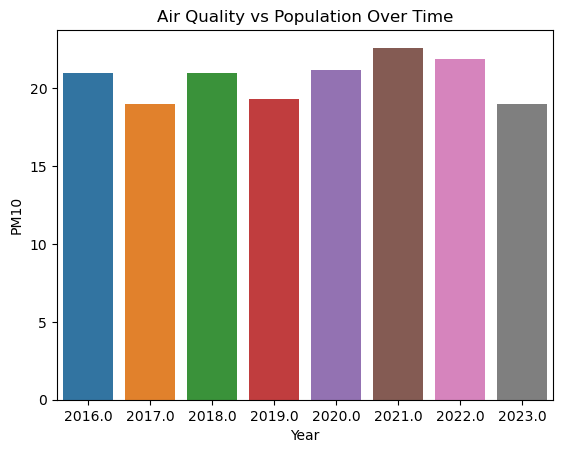

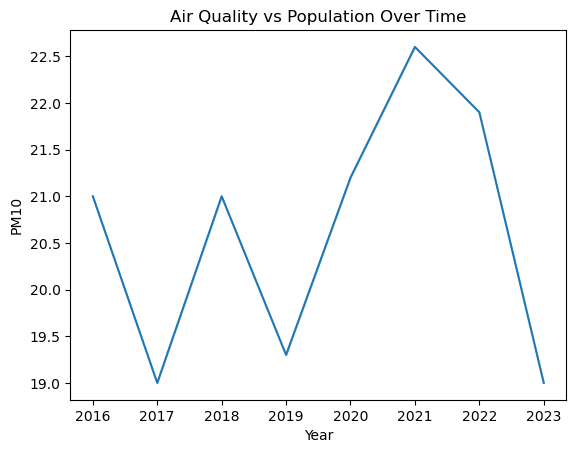

In [5]:
# visualize trends
sns.barplot(data=combined_data, x='Year', y='PM10')
plt.title('Air Quality vs Population Over Time')
plt.show()

sns.lineplot(data=combined_data, x='Year', y='PM10')
plt.title('Air Quality vs Population Over Time')
plt.show()

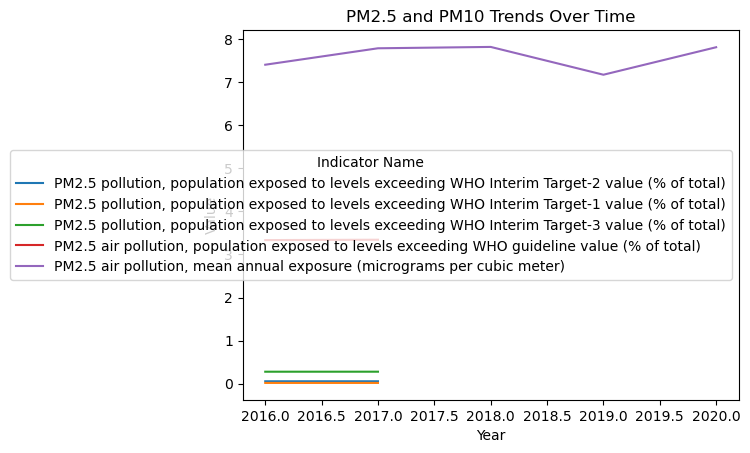

In [6]:
# filter rows for PM2.5 and PM10 indicators // SPOILER these graphs were useless
pm_data = combined_data[combined_data['Indicator Name'].str.contains('PM2.5|PM10', na=False)]

# Line plot to compare trends
sns.lineplot(data=pm_data, x='Year', y='WB Value', hue='Indicator Name')
plt.title('PM2.5 and PM10 Trends Over Time')
plt.ylabel('Value')
plt.show()

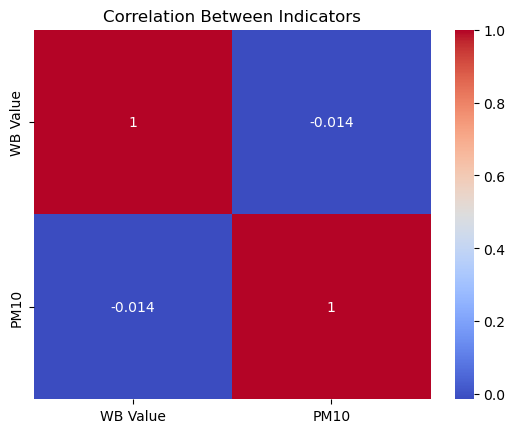

In [7]:
# spoiler this graph also shows basically nothing but at least we have it
# select numeric columns for correlation
numeric_data = combined_data[['WB Value', 'PM10']].dropna()

# calculate and plot correlation heatmap
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Indicators')
plt.show()

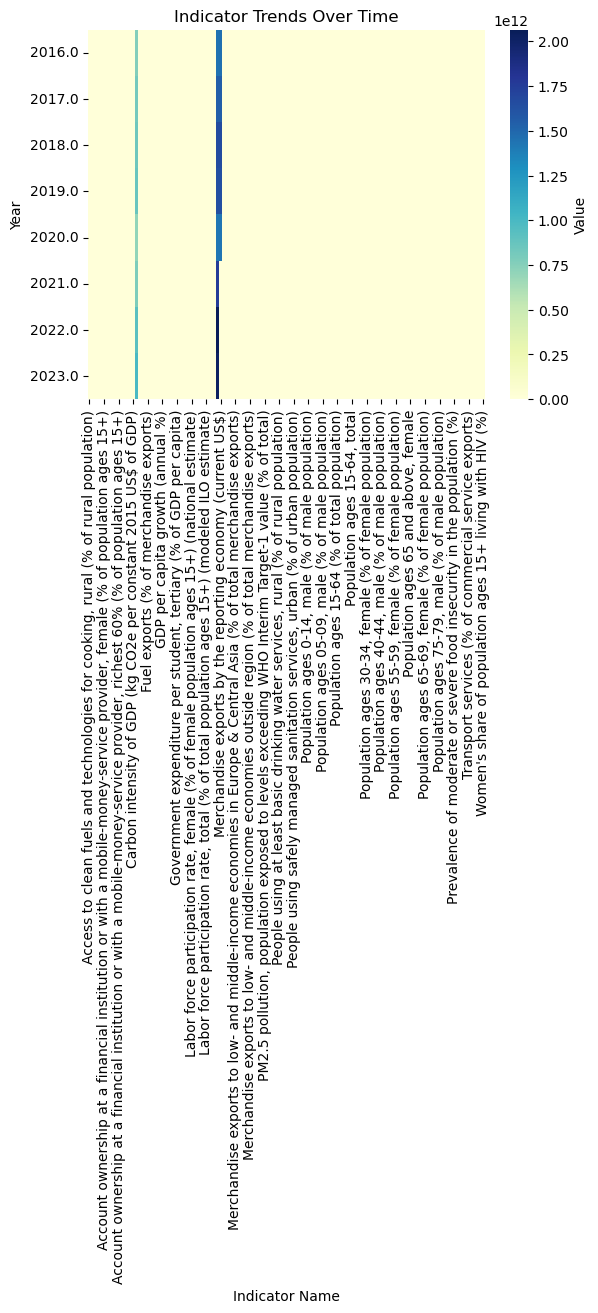

In [8]:
# pivot the data for heatmap
pivot_data = combined_data.pivot(index='Year', columns='Indicator Name', values='WB Value').fillna(0)

# heatmap for indicator trends over time
sns.heatmap(pivot_data, cmap='YlGnBu', cbar_kws={'label': 'Value'})
plt.title('Indicator Trends Over Time')
plt.xlabel('Indicator Name')
plt.ylabel('Year')
plt.show()
# not entirely sure how to interpet this one yet, darker colors indicate more varying trends i believe

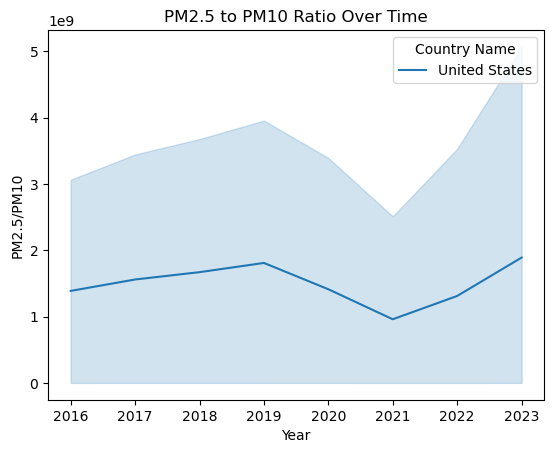

In [9]:
# calculate PM2.5/PM10 ratio
combined_data['PM2.5_to_PM10'] = combined_data['WB Value'] / combined_data['PM10']

# line plot for ratio over time
sns.lineplot(data=combined_data, x='Year', y='PM2.5_to_PM10', hue='Country Name')
plt.title('PM2.5 to PM10 Ratio Over Time')
plt.ylabel('PM2.5/PM10')
plt.show()
# shows that pm10 generally < pm2.5, explore further later ?

In [10]:
# further: explore relationships between air quality indicators like PM10 or pm2.5 and socioeconomic factors (e.g., GDP, population)

# possibly use group by for columns and calculate mean PM10 values
# grouped_pm10 = combined_data.groupby('Indicator Name')['PM10'].mean().sort_values(ascending=False)
# sns.barplot(x=grouped_pm10[:10].index, y=grouped_pm10[:10].values)
# plt.xticks(rotation=45)
# plt.title('Top 10 __ by PM10 Levels')
# plt.ylabel('PM10 (µg/m³)')
# plt.xlabel('__')
# plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# create a dictionary to map indicators to categories
indicator_categories = {
    'TRADE': ['exports', 'imports', 'trade', 'merchandise'],
    'ECONOMIC': ['gdp', 'gni', 'income', 'economic'],
    'POPULATION': ['population', 'urban', 'rural'],
    'FOOD': ['food', 'agriculture', 'nutrition'],
    'HEALTH': ['health', 'mortality', 'life expectancy']
}

# function to categorize indicators
def categorize_indicator(indicator_name):
    indicator_lower = indicator_name.lower()
    for category, keywords in indicator_categories.items():
        if any(keyword in indicator_lower for keyword in keywords):
            return category
    return 'OTHER'

# add category column
combined_data['Category'] = combined_data['Indicator Name'].apply(categorize_indicator)

# count indicators per category
category_counts = combined_data['Category'].value_counts()
print("Indicators per category:")
print(category_counts)

Indicators per category:
POPULATION    691
TRADE         151
ECONOMIC       73
OTHER           5
Name: Category, dtype: int64


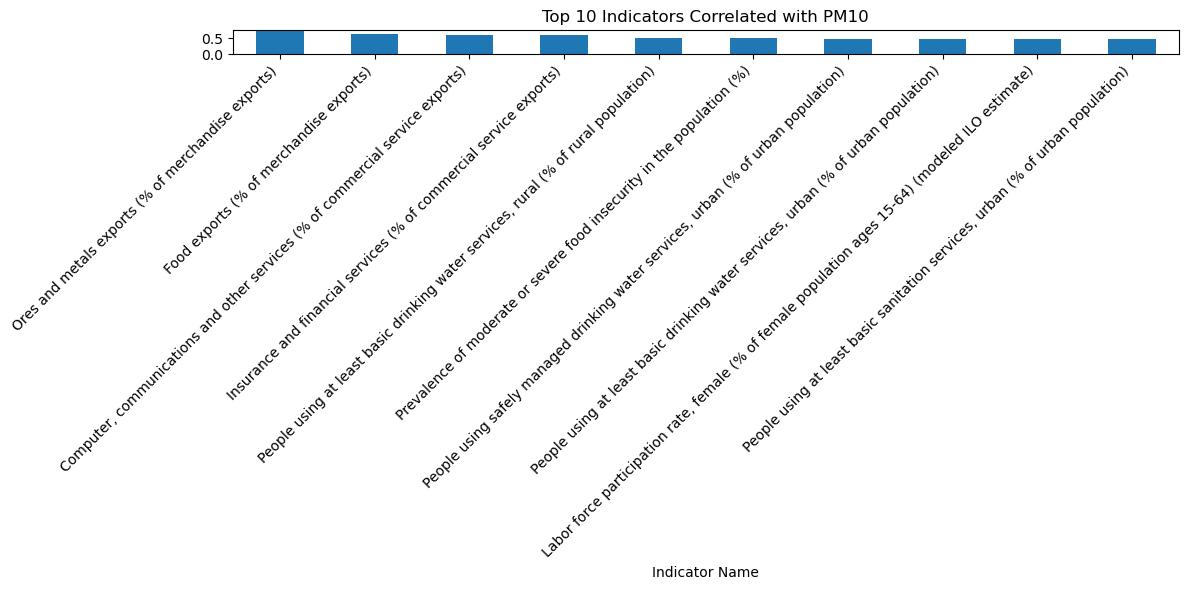


Top 5 positively correlated indicators with PM10:
                                                    correlation
Indicator Name                                                 
Ores and metals exports (% of merchandise exports)     0.707821
Food exports (% of merchandise exports)                0.637038
Computer, communications and other services (% ...     0.603506
Insurance and financial services (% of commerci...     0.588094
People using at least basic drinking water serv...     0.488431

Top 5 negatively correlated indicators with PM10:
                                                    correlation
Indicator Name                                                 
Labor force participation rate, total (% of tot...    -0.714542
Labor force participation rate, female (% of fe...    -0.799407
Labor force participation rate, female (% of fe...    -0.808858
People practicing open defecation, rural (% of ...          NaN
People practicing open defecation, urban (% of ...          NaN


In [12]:
import matplotlib.pyplot as plt

# pivot the data to create a matrix with countries as rows and indicators as columns
pivot_df = combined_data.pivot_table(
    index=['Country Name', 'Year', 'PM10'],
    columns='Indicator Name',
    values='WB Value'
).reset_index()

# select columns with at least 50% non-null values
threshold = len(pivot_df) * 0.5
pivot_df = pivot_df.loc[:, pivot_df.notna().sum() > threshold]

# standardize the data (excluding PM10)
columns_to_standardize = [col for col in pivot_df.columns if col not in ['Country Name', 'Year', 'PM10']]
scaler = StandardScaler()
pivot_df[columns_to_standardize] = scaler.fit_transform(pivot_df[columns_to_standardize].fillna(0))

# calculate correlation with PM10
correlations = pivot_df[columns_to_standardize].corrwith(pivot_df['PM10']).sort_values(ascending=False)

# plot top correlations
plt.figure(figsize=(12, 6))
correlations.head(10).plot(kind='bar')
plt.title('Top 10 Indicators Correlated with PM10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 5 positively correlated indicators with PM10:")
print(correlations.head().to_frame('correlation'))

print("\nTop 5 negatively correlated indicators with PM10:")
print(correlations.tail().to_frame('correlation'))

In [13]:
pivot_df.head()

Indicator Name,Country Name,Year,PM10,"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural raw materials exports (% of merchandise exports),Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),...,Prevalence of severe food insecurity in the population (%),Rural population,Rural population (% of total population),Rural population growth (annual %),Transport services (% of commercial service exports),Travel services (% of commercial service exports),Urban population,Urban population (% of total population),Urban population growth (annual %),Women's share of population ages 15+ living with HIV (%)
0,United States,2016.0,21.0,0.377964,0.377964,0.377964,0.377964,1.119042,0.668560,0.668560,...,1.009588,1.368248,1.503960,1.115185,0.794251,1.082283,-1.575279,-1.503960,0.764861,0.392751
1,United States,2017.0,19.0,0.377964,0.377964,0.377964,0.377964,1.086503,0.546229,0.546229,...,0.658427,1.066146,1.087168,0.625801,0.657329,0.883107,-1.090221,-1.087168,0.378236,0.387172
2,United States,2018.0,21.0,0.377964,0.377964,0.377964,0.377964,0.772980,0.552879,0.552879,...,0.307266,0.679909,0.666123,0.142296,1.147576,0.844221,-0.659708,-0.666123,-0.088256,0.382144
3,United States,2019.0,19.3,0.377964,0.377964,0.377964,0.377964,-0.478843,0.383270,0.383270,...,0.307266,0.222433,0.234445,-0.276181,0.576837,0.695175,-0.263075,-0.234445,-0.381388,0.376500
4,United States,2020.0,21.2,0.377964,0.377964,0.377964,0.377964,0.221204,0.142502,0.142502,...,-0.043895,0.087121,-0.201485,1.549629,-1.806333,-1.414134,0.431470,0.201485,1.922872,0.370056
